# Moon Path Tracking with Skyfield

In [1]:
import skyfield
from skyfield.api import load
from skyfield.api import Topos

ephemeris = load('de421.bsp')

In [4]:
earth, moon = ephemeris['earth'], ephemeris['moon']

In [7]:
ts = load.timescale()

In [8]:
t = ts.now()

In [9]:
nyc = earth + Topos('40.718784 N' , '-73.990027 W')

In [10]:
astrometric = nyc.at(t).observe(moon)

In [11]:
alt, az, d = astrometric.apparent().altaz()

In [121]:
az.dms()

(70.0, 52.0, 35.049965678103035)

## Plotting altitude and azimuth over time

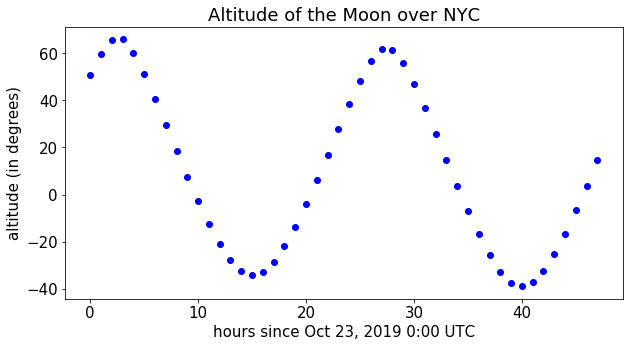

In [148]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 15

def get_altitude(hour, location=nyc):
    t = ts.utc(2019, 10, 23, hour)
    alt, az, d = location.at(t).observe(moon).apparent().altaz()
    return alt.degrees

days = 2
alts = [get_altitude(hour) for hour in range(0, 24 * days)]

plt.title('Altitude of the Moon over NYC')
plt.ylabel('altitude (in degrees)')
plt.xlabel('hours since Oct 23, 2019 0:00 UTC')
plt.plot(alts, 'ob')

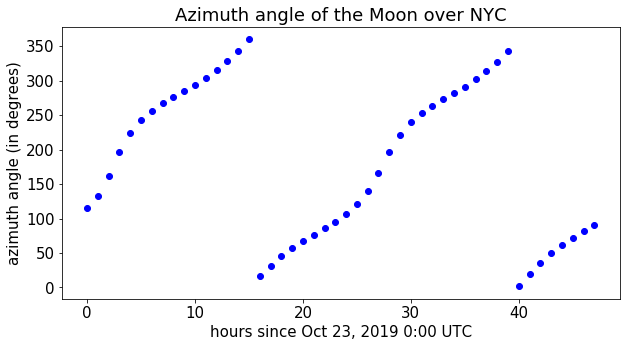

In [147]:
def get_azimuth(hour, location=nyc):
    t = ts.utc(2019, 10, 23, hour)
    alt, az, d = location.at(t).observe(moon).apparent().altaz()
    return az.degrees

days = 2
azs = [get_azimuth(hour, nyc) for hour in range(0, 24 * days)]

plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Azimuth angle of the Moon over NYC')
plt.ylabel('azimuth angle (in degrees)')
plt.xlabel('hours since Oct 23, 2019 0:00 UTC')
plt.plot(azs, 'ob')

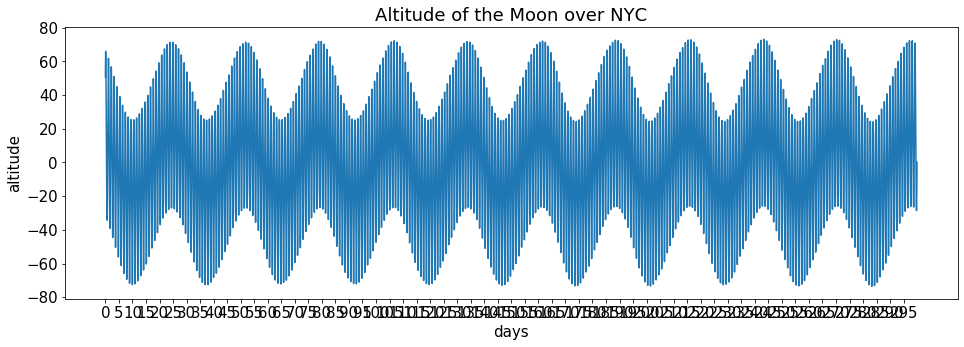

In [173]:
days = 300
alts = [get_altitude(hour) for hour in range(0, 24 * days)]

plt.rcParams['figure.figsize'] = [16, 5]
plt.title('Altitude of the Moon over NYC')
plt.ylabel('altitude')
plt.xlabel('days')

mult = 5
plt.xticks(range(0, 24 * days, 24 * mult), range(0, int(days), mult))
plt.plot(alts)

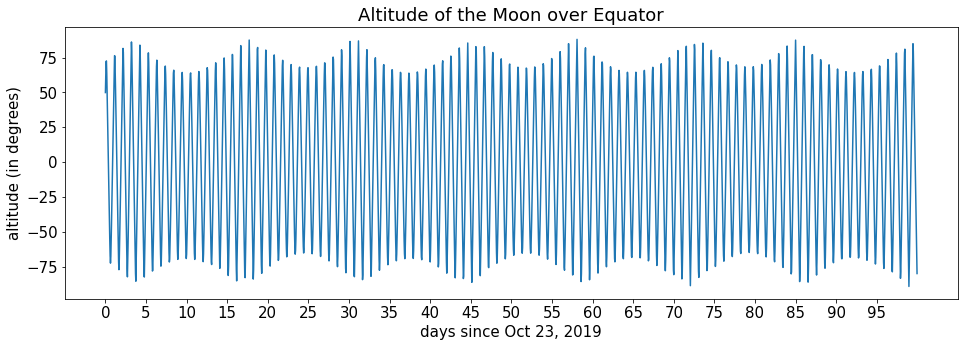

In [170]:
equator = earth + Topos('2 N' , '-73.990027 W')

days = 100
alts = [get_altitude(hour, equator) for hour in range(0, 24 * days)]

plt.rcParams['figure.figsize'] = [16, 5]
plt.title('Altitude of the Moon over Equator')
plt.ylabel('altitude (in degrees)')
plt.xlabel('days since Oct 23, 2019')

mult = 5
plt.xticks(range(0, 24 * days, 24 * mult), range(0, int(days), mult))
plt.plot(alts)

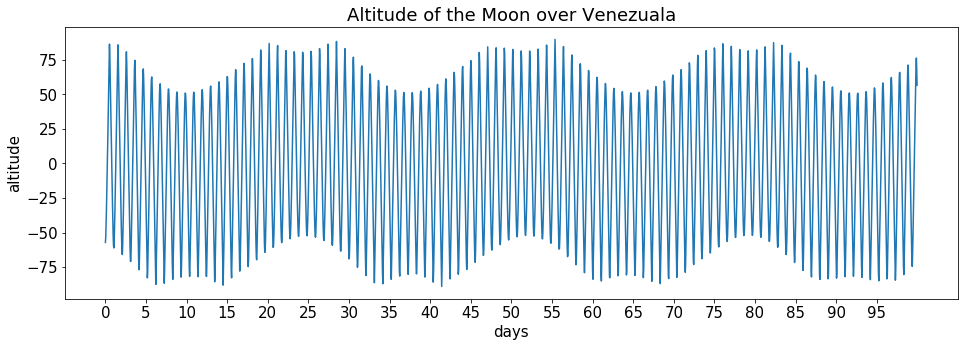

In [168]:
finland = earth + Topos('66 N', '25 E')
nz = earth + Topos('43 S', '34 E')
ecuador = earth + Topos('3 N', '79 W')
test = earth + Topos('20 N', '79 W')
venezuala = earth + Topos('15 N', '66 W')

days = 100
alts = [get_altitude(hour, venezuala) for hour in range(0, 24 * days)]

plt.rcParams['figure.figsize'] = [16, 5]
plt.title('Altitude of the Moon over Venezuala')
plt.ylabel('altitude')
plt.xlabel('days')

mult = 5
plt.xticks(range(0, 24 * days, 24 * mult), range(0, int(days), mult))
plt.plot(alts)

In [8]:
%%latex
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

<IPython.core.display.Latex object>